In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from tabulate import tabulate
from scipy.stats import skew

In [5]:
dataset = pd.read_csv(r"Data\sleep_duration.csv")
dataset.head()

,Nama Mahasiswa,Durasi Tidur (Jam)
0,Adnan R.,7.0
1,Bunga S.,6.5
2,Candra M.,7.8
3,Dian P.,7.2
4,Eko H.,6.0


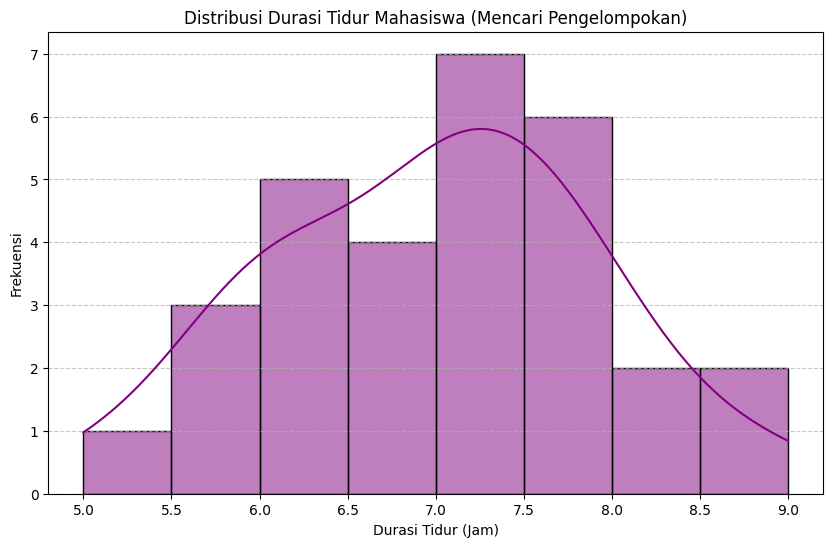

In [6]:
plt.figure(figsize=(10, 6))

sns.histplot(dataset['Durasi Tidur (Jam)'], kde=True, binwidth=0.5, color='purple')

plt.title('Distribusi Durasi Tidur Mahasiswa (Mencari Pengelompokan)')
plt.xlabel('Durasi Tidur (Jam)')
plt.ylabel('Frekuensi')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.close()

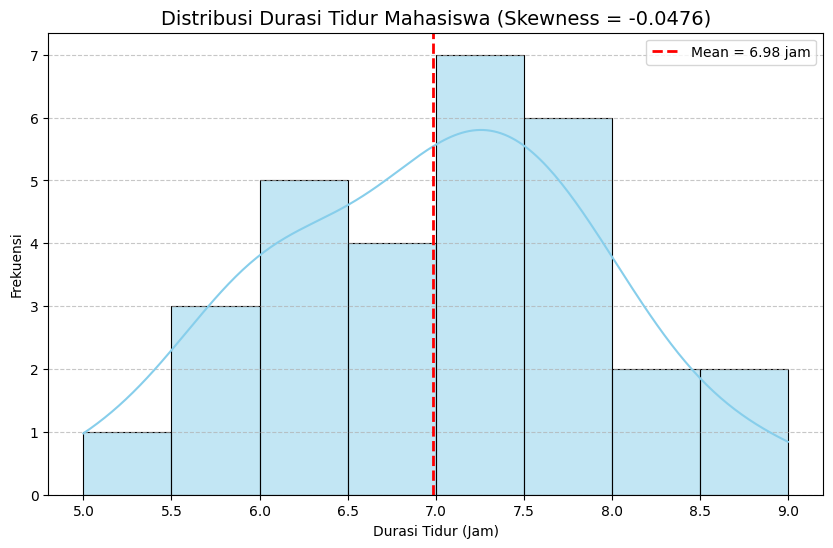

In [13]:
skew_value = skew(dataset['Durasi Tidur (Jam)'])
mean_value = dataset['Durasi Tidur (Jam)'].mean()


# --- VISUALISASI DISTRIBUSI DATA ---
plt.figure(figsize=(10, 6))

# Plot distribusi: Menggunakan binwidth=0.5 dan KDE
sns.histplot(dataset['Durasi Tidur (Jam)'], 
             kde=True, 
             binwidth=0.5, 
             color='skyblue', 
             edgecolor='black',
             linewidth=0.8)

# Tambahkan Judul dengan Nilai Skewness (dibulatkan 4 desimal)
plt.title(f"Distribusi Durasi Tidur Mahasiswa (Skewness = {skew_value:.4f})", fontsize=14)
plt.xlabel("Durasi Tidur (Jam)")
plt.ylabel("Frekuensi")

# Garis mean (Rata-rata) untuk perbandingan visual
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_value:.2f} jam")
plt.legend()

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# --- INTERPRETASI SKEWNESS ---
# Menggunakan ambang batas 0.1 untuk mengabaikan kemiringan yang sangat kecil
if skew_value > 0.1:
    jenis = "Positif (Right Skewed)"
    arah = "kanan"
    interpretasi = "sebagian besar mahasiswa tidur sedikit lebih sebentar dari rata-rata, dengan beberapa outlier yang tidur sangat lama."
elif skew_value < -0.1:
    jenis = "Negatif (Left Skewed)"
    arah = "kiri"
    interpretasi = "sebagian besar mahasiswa tidur sedikit lebih lama dari rata-rata, dengan beberapa outlier yang tidur sangat sebentar."
else:
    jenis = "Simetris (Tidak Skewed)"
    arah = "tengah"
    interpretasi = "durasi tidur mahasiswa relatif seimbang di sekitar rata-rata."


In [8]:
grouping_result = dataset.groupby('Durasi Tidur (Jam)')['Nama Mahasiswa'].apply(list).reset_index()


for index, row in grouping_result.iterrows():
    durasi = row['Durasi Tidur (Jam)']
    nama_list = ', '.join(row['Nama Mahasiswa'])
    jumlah = len(row['Nama Mahasiswa'])
    
    print(f"Durasi Tidur: {durasi} jam ({jumlah} Mahasiswa)")
    print(f"Nama Mahasiswa: {nama_list}")
    print('-' * 50)  


Durasi Tidur: 5.0 jam (1 Mahasiswa)
Nama Mahasiswa: Zaki M.
--------------------------------------------------
Durasi Tidur: 5.5 jam (1 Mahasiswa)
Nama Mahasiswa: Wawan C.
--------------------------------------------------
Durasi Tidur: 5.8 jam (1 Mahasiswa)
Nama Mahasiswa: Xenia Z.
--------------------------------------------------
Durasi Tidur: 5.9 jam (1 Mahasiswa)
Nama Mahasiswa: Doni H.
--------------------------------------------------
Durasi Tidur: 6.0 jam (2 Mahasiswa)
Nama Mahasiswa: Eko H., Yayan K.
--------------------------------------------------
Durasi Tidur: 6.1 jam (1 Mahasiswa)
Nama Mahasiswa: Ahmad F.
--------------------------------------------------
Durasi Tidur: 6.2 jam (1 Mahasiswa)
Nama Mahasiswa: Sari L.
--------------------------------------------------
Durasi Tidur: 6.3 jam (1 Mahasiswa)
Nama Mahasiswa: Elsa I.
--------------------------------------------------
Durasi Tidur: 6.5 jam (1 Mahasiswa)
Nama Mahasiswa: Bunga S.
---------------------------------------

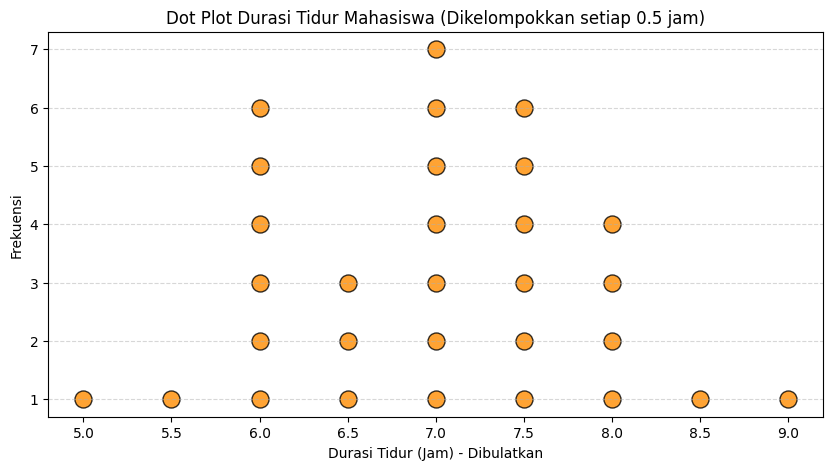

In [9]:
faktor_pembulatan = 0.5
durasi_binning = np.round(dataset['Durasi Tidur (Jam)'] / faktor_pembulatan) * faktor_pembulatan

x_coords = []
y_coords = []
value_counts = Counter() 

for value in sorted(durasi_binning.tolist()):
    y_coords.append(value_counts[value] + 1)
    x_coords.append(value)
    value_counts[value] += 1

plt.figure(figsize=(10, 5))
plt.scatter(x=x_coords, y=y_coords, s=150, color='darkorange', edgecolor='black', alpha=0.8)

plt.title(f'Dot Plot Durasi Tidur Mahasiswa (Dikelompokkan setiap {faktor_pembulatan} jam)')
plt.xlabel('Durasi Tidur (Jam) - Dibulatkan')
plt.ylabel('Frekuensi')
plt.yticks(range(1, max(y_coords) + 1)) 
plt.xticks(sorted(value_counts.keys())) 

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [10]:
Jam = dataset['Durasi Tidur (Jam)']

stem_leaf = {}
for value in Jam:
    val = int(round(value * 10))
    stem, leaf = divmod(val, 10)
    stem_leaf.setdefault(stem, []).append(leaf)

table_data = []
for stem in sorted(stem_leaf.keys()):
    leaves = ' '.join(str(l) for l in sorted(stem_leaf[stem]))
    table_data.append([stem, leaves])

print(tabulate(table_data, headers=["Stem", "Leaves"], tablefmt="grid"))


+--------+---------------------------+
|   Stem | Leaves                    |
+========+===========================+
|      5 | 0 5 8 9                   |
+--------+---------------------------+
|      6 | 0 0 1 2 3 5 7 8 9         |
+--------+---------------------------+
|      7 | 0 0 1 2 2 3 4 5 5 6 7 8 9 |
+--------+---------------------------+
|      8 | 0 1 5                     |
+--------+---------------------------+
|      9 | 0                         |
+--------+---------------------------+
